# **Data Visualization 2 - Charting with Python - Lecture 1 - Line charts**
---

In [53]:
# importing the libraries that we are gonna use
import plotly
import plotly.express as px
import pandas as pd
import plotly.io as pio
pio.templates.default = 'plotly_white'

# 3.Line charts

A line graph —also known as a line plot or a line chart— is a graph that uses lines to connect individual data points. A line graph displays quantitative values over a specified time interval.

For our line chart let's use the stocks() sample data set. Each row in this wide dataset represents closing prices from 6 tech stocks in 2018/2019.

In [54]:
# creating the data frame
df_stocks = px.data.stocks()

# taking a look at the data frame
df_stocks

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472


## Base version

Let's visualize the closing prices of GOOG over the years.

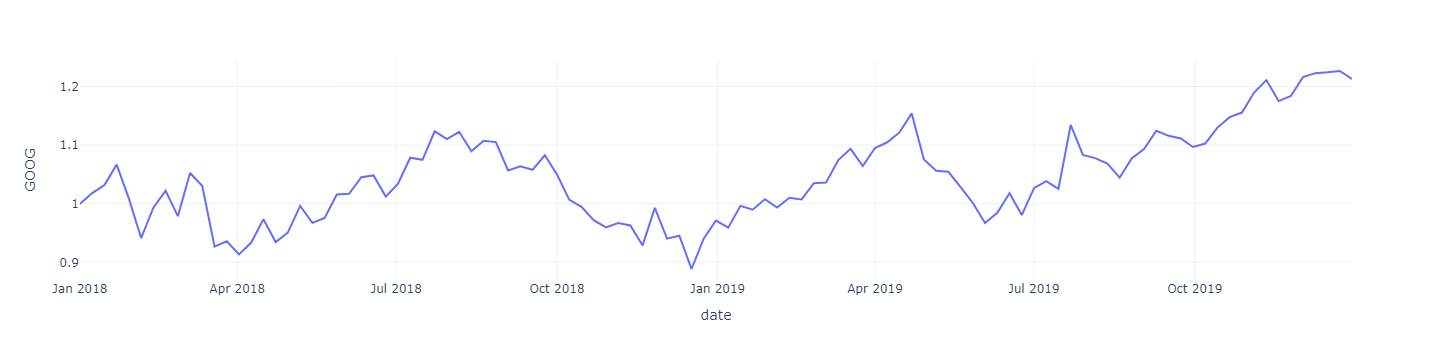

In [55]:
# creating the line chart
line = px.line(df_stocks, x = 'date', y = 'GOOG')

# rendering the chart
line.show()

## Applying the customizations we have seen before

### Adding a title

In [56]:
# adding a title the same way we did before
title_ = 'Historical price data for GOOG'

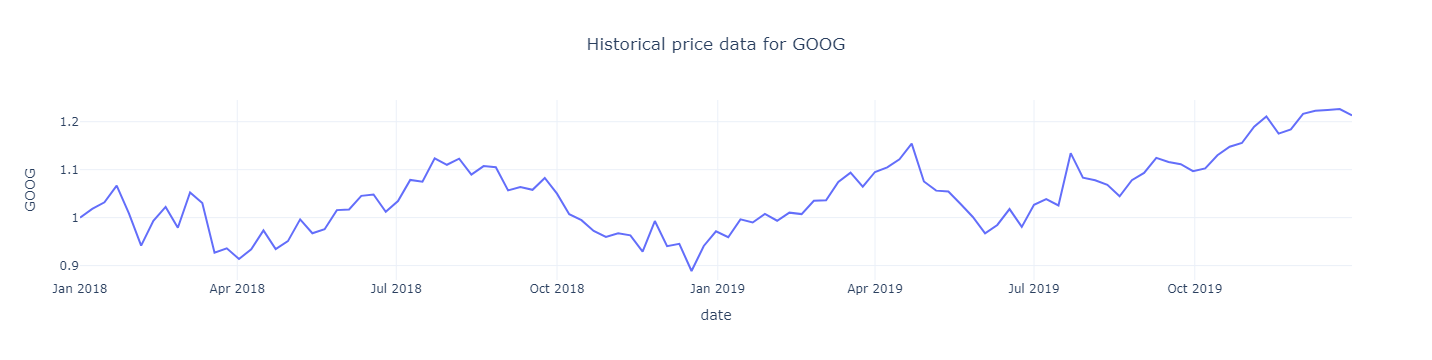

In [57]:
line = px.line(df_stocks, x = 'date', y = 'GOOG',
               title = title_)

line.update_layout(title_x = 0.5)

line.show()

### Changing the labeling

Similarly to bar charts and scatter plots we can easily change the labels of the chart with the labels parameter.

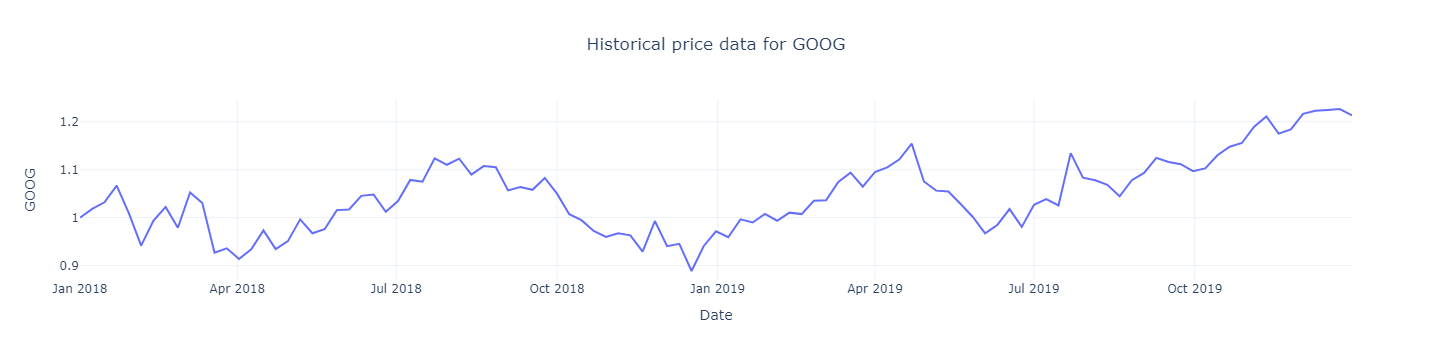

In [58]:
line = px.line(df_stocks, x = 'date', y = 'GOOG',
               title = title_,
               labels = {'date': 'Date'}
               )

line.update_layout(title_x = 0.5)

line.show()

## Adding data point markers

The `markers` argument can be set to `True` to show markers on lines.

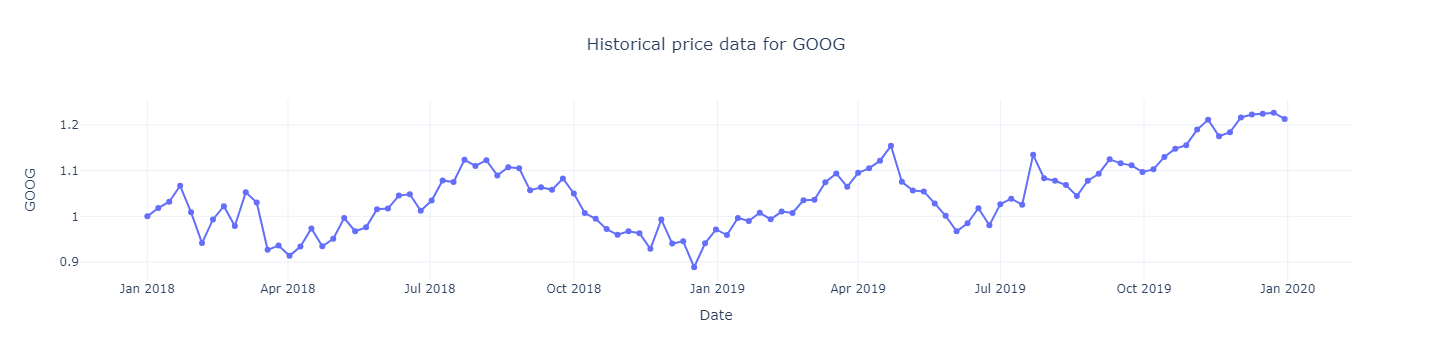

In [59]:
line = px.line(df_stocks, x = 'date', y = 'GOOG',
               title = title_,
               labels = {'date': 'Date'},
               markers = True
               )

line.update_layout(title_x = 0.5)

line.show()

## Adding multiple column values to the chart

In [60]:
title_ = 'Historical price data for selected stocks'

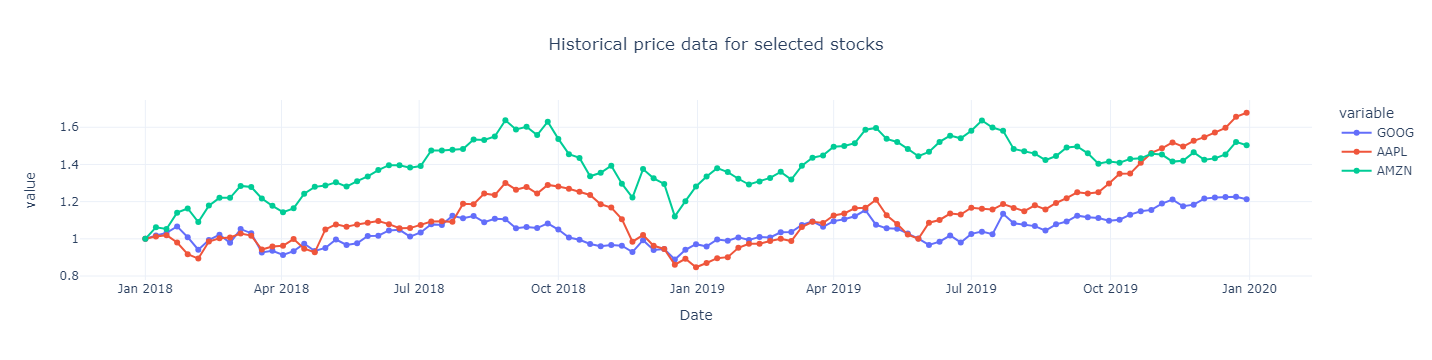

In [61]:
line = px.line(df_stocks, x = 'date', y = ['GOOG','AAPL','AMZN'],
               title = title_,
               labels = {'date': 'Date'},
               markers = True
               )

line.update_layout(title_x = 0.5)

line.show()

### Correcting the labels

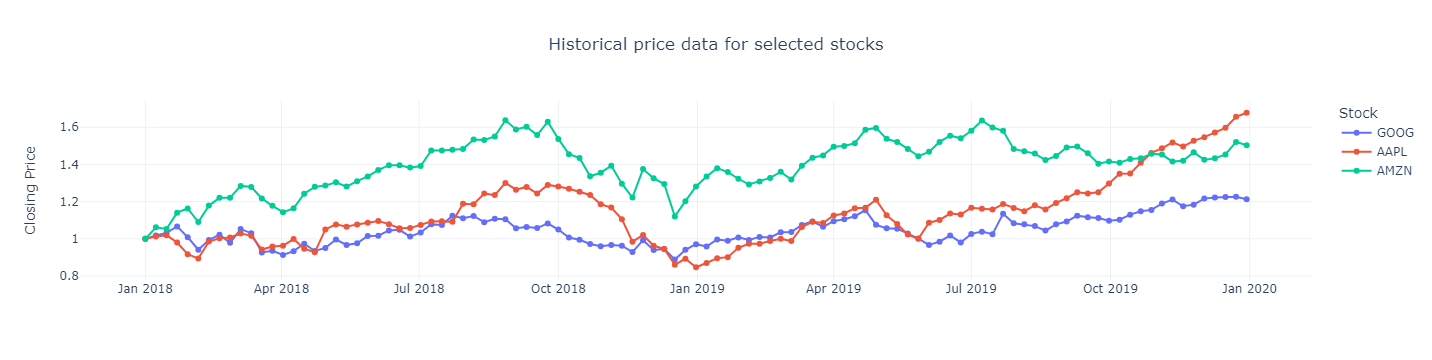

In [62]:
line = px.line(df_stocks, x = 'date', y = ['GOOG','AAPL','AMZN'],
               title = title_,
               labels = {'date': 'Date', 'variable' : 'Stock', 'value' : 'Closing Price'},
               markers = True
               )

line.update_layout(title_x = 0.5, xaxis_title = None)

line.show()

## Changing the coloring

Lets go back to the gapminder dataset and visualize the change in gdp per capita over the years for the European countries with more than 20 million of population.

In [63]:
df_gap = px.data.gapminder().query('continent =="Europe" and pop > 20e6')

df_gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
528,France,Europe,1952,67.41,42459667,7029.809327,FRA,250
529,France,Europe,1957,68.93,44310863,8662.834898,FRA,250
530,France,Europe,1962,70.51,47124000,10560.485530,FRA,250
531,France,Europe,1967,71.55,49569000,12999.917660,FRA,250
532,France,Europe,1972,72.38,51732000,16107.191710,FRA,250


In [64]:
# making a seperate dict for labels
labels_ = {
    'year' : 'Year',
    'gdpPercap' : 'GDP per Capita',
    'country' : 'Country',
    'lifeExp' : 'Life Expectancy'
}

# variable for the title
title_ = 'GDP per capita over the years <br><sup>For countries with over 20 M of population</sup>'

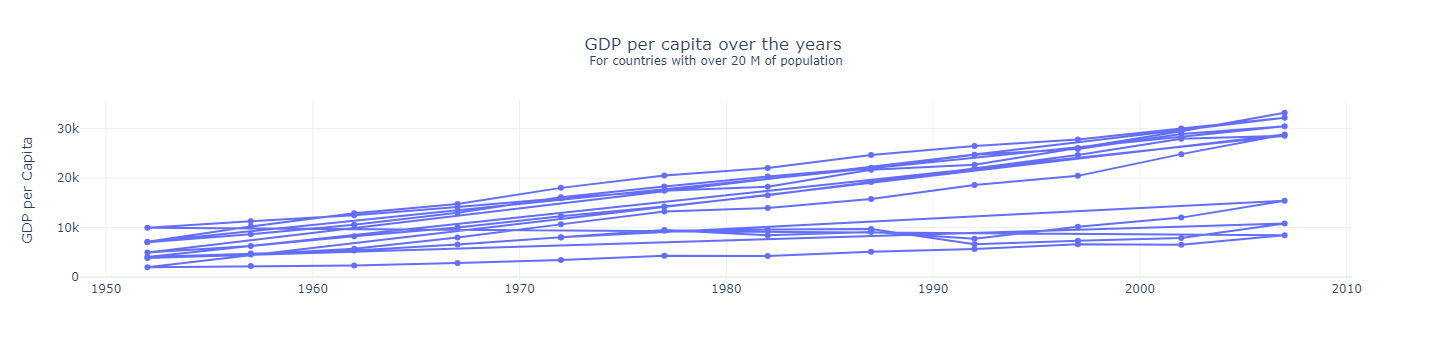

In [65]:
line_gap = px.line(df_gap, x = 'year', y = 'gdpPercap',
               #color = 'country',
               title = title_,
               #hover_data = {'gdpPercap' : ':.2f', 'country' : True},
               markers = True,
               labels = labels_
              )

line_gap.update_layout(title_x = 0.5, xaxis_title = None)

line_gap.show()

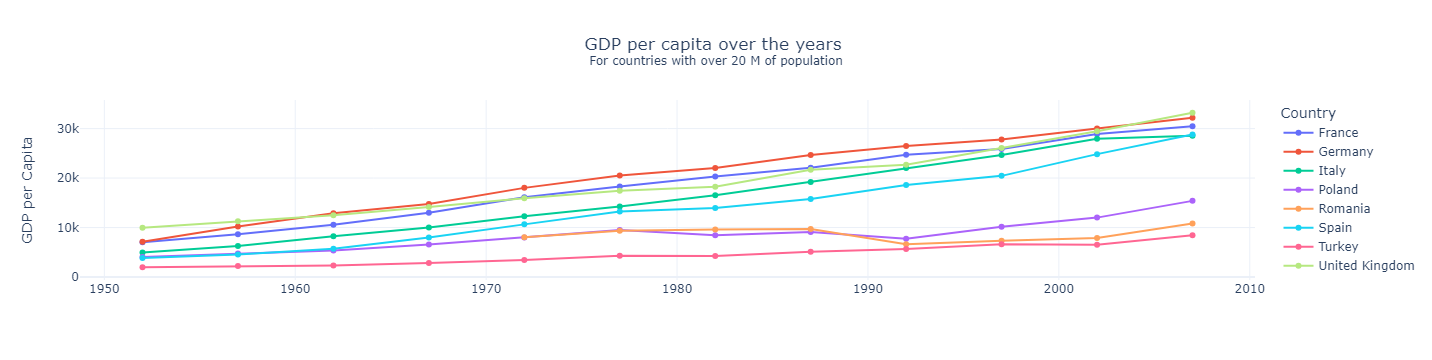

In [66]:
line_gap = px.line(df_gap, x = 'year', y = 'gdpPercap',
               color = 'country',
               title = title_,
               hover_data = {'gdpPercap' : ':.2f'},
               markers = True,
               labels = labels_
              )

line_gap.update_layout(title_x = 0.5, xaxis_title = None)

line_gap.show()

## Changing the size of the chart

Changing the size of the chart can be done the some way we did before.

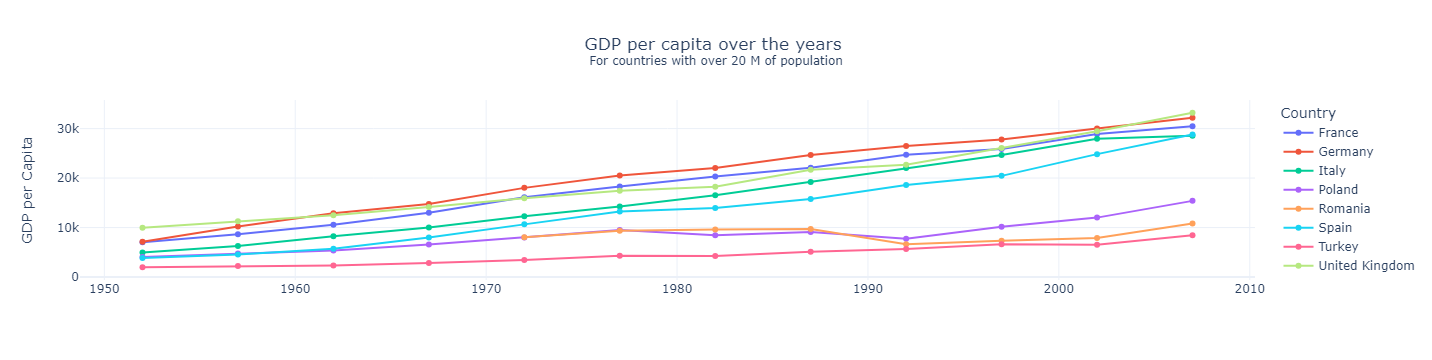

In [67]:
line_gap = px.line(df_gap, x = 'year', y = 'gdpPercap',
               color = 'country',
               title = title_,
               hover_data = {'gdpPercap' : ':.2f'},
               markers = True,
               labels = labels_,
               width = 1000
              )

line_gap.update_layout(title_x = 0.5, xaxis_title = None)

line_gap.show()

## Faceted line chart

Faceting is the process that split the chart window in several small parts (a grid), and display a similar chart in each section.

Let's display the same line chart but this time the faceted version.

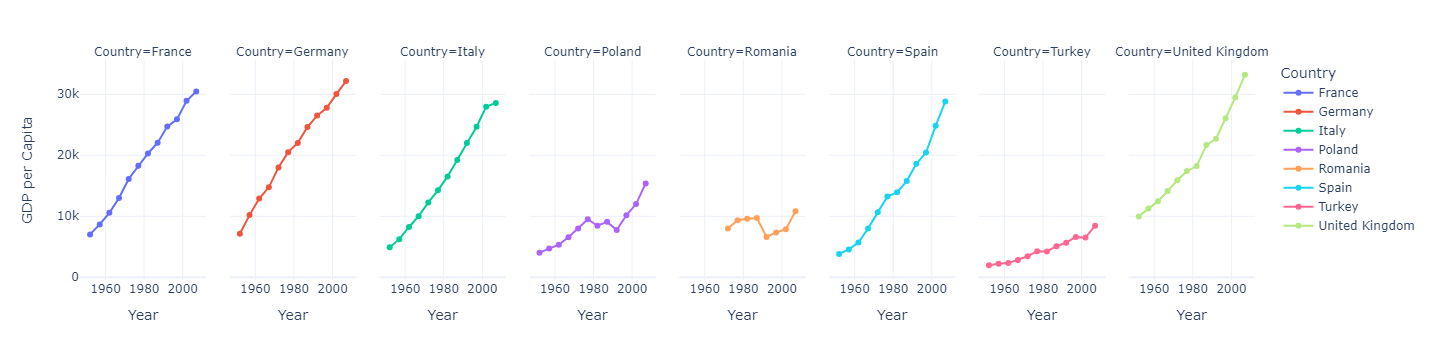

In [68]:
line_gap = px.line(df_gap, x = 'year', y = 'gdpPercap',
               hover_data = {'gdpPercap' : ':.2f'},
               color = 'country',
               markers = True,
               labels = labels_,
               facet_col = 'country'
              )

line_gap.show()

When the facet dimension has a large number of unique values, it is possible to wrap columns using the `facet_col_wrap` argument.

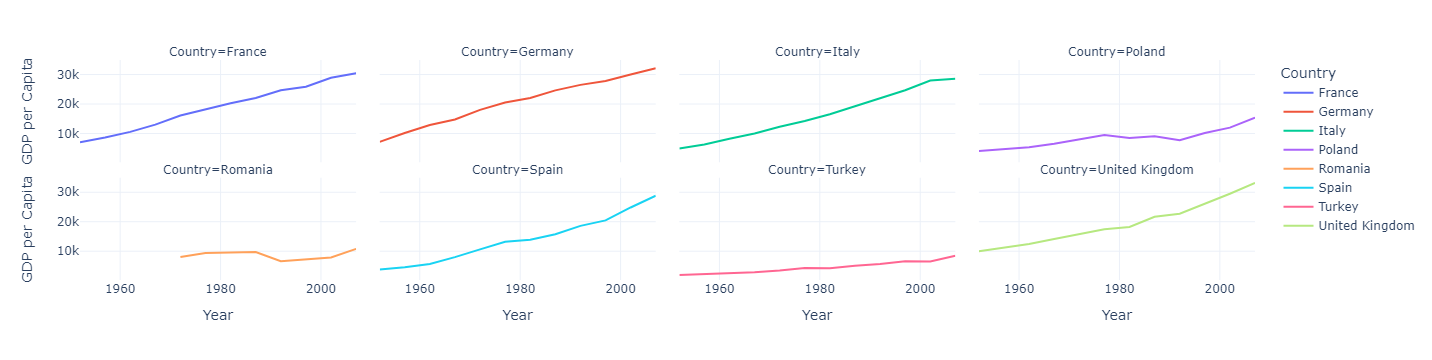

In [69]:
line_gap = px.line(df_gap, x = 'year', y = 'gdpPercap',
               hover_data = {'gdpPercap' : ':.2f'},
               color = 'country',
               #markers = True,
               labels = labels_,
               facet_col = 'country',
               facet_col_wrap = 4,
               width = 1000
              )

line_gap.show()

### Removing axis title for faceted charts

Removing the axis titles for faceted charts is a bit tricky because if we use the previously seen method then only the first columns axis titles disappear but the others remain.

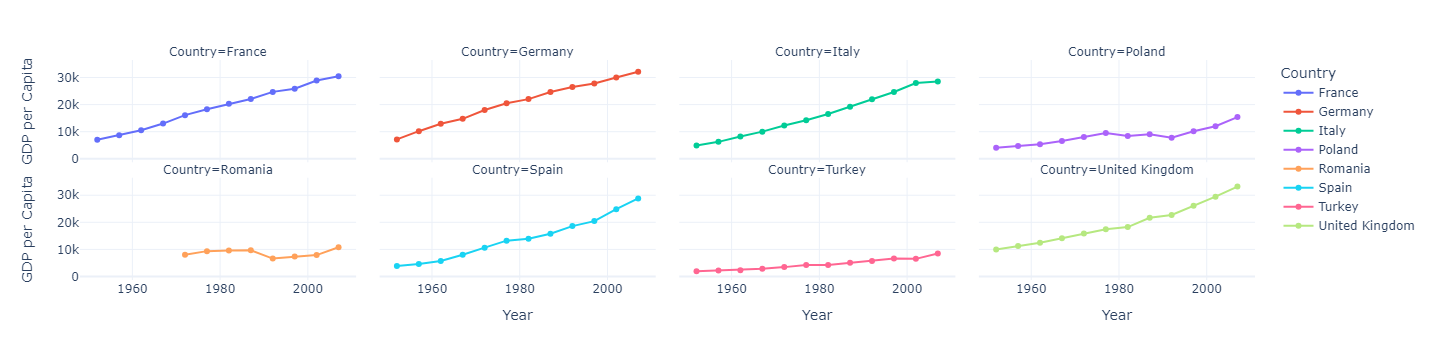

In [70]:
line_gap = px.line(df_gap, x = 'year', y = 'gdpPercap',
               hover_data = {'gdpPercap' : ':.2f'},
               color = 'country',
               markers = True,
               labels = labels_,
               facet_col = 'country',
               facet_col_wrap = 4,
               width = 1000
              )

line_gap.update_layout(title_x = 0.5, xaxis_title = None)

line_gap.show()

We can use a for loop however and utilize the graph objects module of plotly to further customize parts of our visualization.

In [71]:
import plotly.graph_objects as go

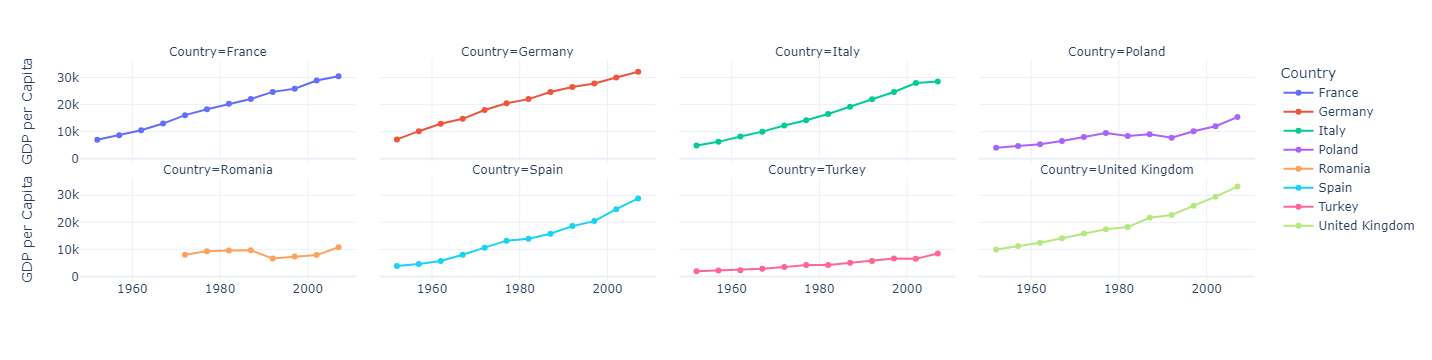

In [72]:
for axis in line_gap.layout:
    if type(line_gap.layout[axis]) == go.layout.XAxis:
        line_gap.layout[axis].title.text = ''

line_gap.show()

### Modifying the subplot titles

Since the subplot titles are annotations we can take advantage of the `for_each_annotation` function to customize them. Let's remove the 'Country = ' part of the titles.

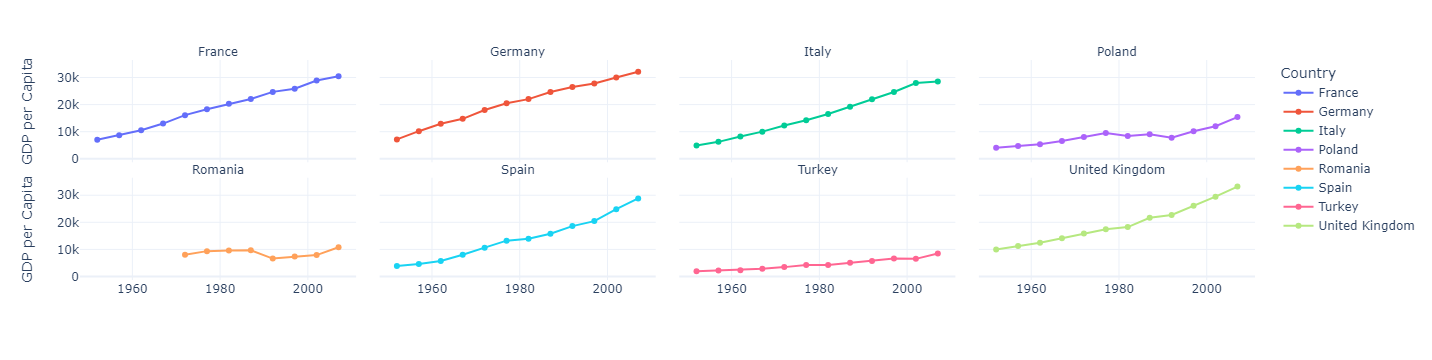

In [73]:
line_gap.for_each_annotation(lambda a: a.update(text=a.text.replace("Country=", "")))

line_gap.show()

## Area chart

Area charts are a visual representation of data that utilizes both lines and filled areas to convey information.

To create an area chart we can simply use the `area()` function of plotly express.

Let's create the an area chart that visualizes the change of GDP per capita over the years but this time for Asia for the countries with over 30 million of population.

In [74]:
df_area = px.data.gapminder().query('continent =="Asia" and pop > 30e6')

df_area.shape

(126, 8)

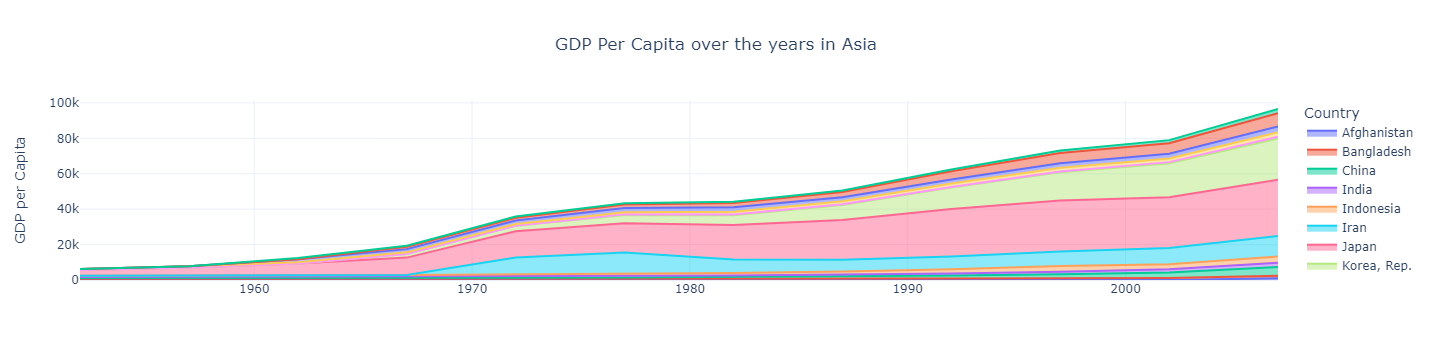

In [75]:
area_gap = px.area(df_area, x = 'year', y = 'gdpPercap',
               line_group = 'country',
               color = 'country',
               title = 'GDP Per Capita over the years in Asia',
               hover_data = {'gdpPercap' : ':.2f'},
               labels = labels_,
               width = 1000
            )

area_gap.update_layout(title_x = 0.5, xaxis_title = None)

area_gap.show()

## Practice exercise

### Code

In [76]:
df_gap = px.data.gapminder().query('continent =="Asia" and pop > 40e6')

df_gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
96,Bangladesh,Asia,1952,37.484,46886859,684.244172,BGD,50
97,Bangladesh,Asia,1957,39.348,51365468,661.637458,BGD,50
98,Bangladesh,Asia,1962,41.216,56839289,686.341554,BGD,50
99,Bangladesh,Asia,1967,43.453,62821884,721.186086,BGD,50
100,Bangladesh,Asia,1972,45.252,70759295,630.233627,BGD,50


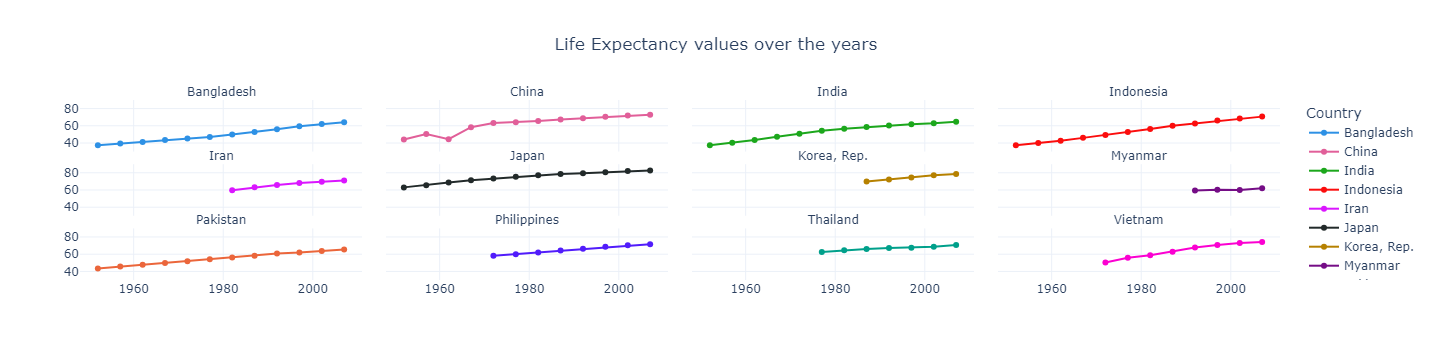

In [77]:
line_gap = px.line(df_gap, x = 'year', y = 'lifeExp',
               color = 'country',
               markers = True,
               labels = labels_,
               facet_col = 'country',
               facet_col_wrap = 4,
               width = 900,
               title = 'Life Expectancy values over the years',
               color_discrete_sequence=px.colors.qualitative.Dark24
              )

line_gap.update_layout(title_x = 0.5)

for axis in line_gap.layout:
    if type(line_gap.layout[axis]) == go.layout.XAxis:
        line_gap.layout[axis].title.text = ''
    elif type(line_gap.layout[axis]) == go.layout.YAxis:
        line_gap.layout[axis].title.text = ''

line_gap.for_each_annotation(lambda a: a.update(text=a.text.replace("Country=", "")))

line_gap.show()

### Chart

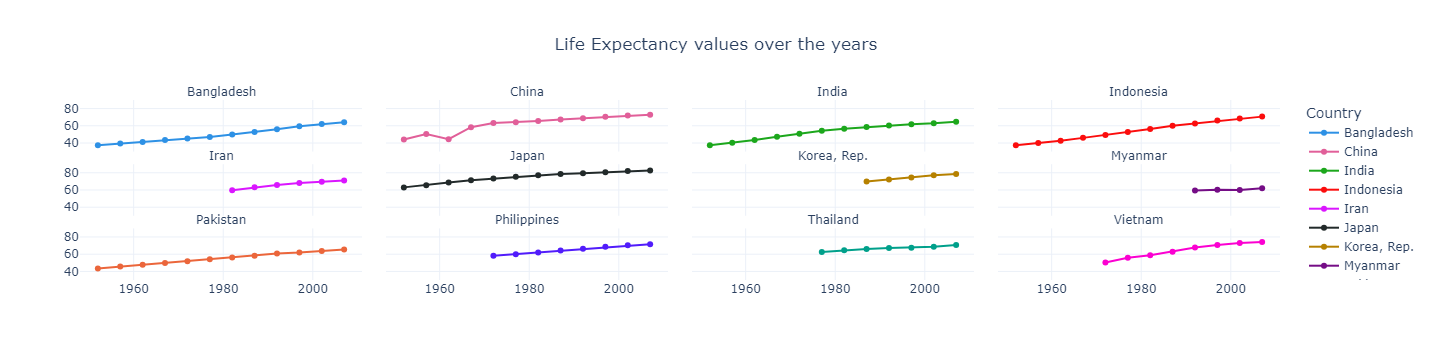

In [78]:
line_gap.show()